# ECEN 5672 – DIGITAL IMAGE PROCESSING - ASSIGNMENT 04 (Module 7 & 8) 

## Problem 1: Structural Similarity Index (SSIM)  

The goal of this problem is to analyze the Structural Similarity (SSIM) Index and study how luminance, contrast, and structure contribute to image-quality perception

A) Read the given image Lion.jpg and convert it to grayscale. Create two modified versions: 

i. 
A blurred version (using a Gaussian filter)( σ = 0.8) 

ii. A contrast-reduced version (by scaling intensities). 
Display the three images (original, blurred, contrast-reduced) and label them clearly.

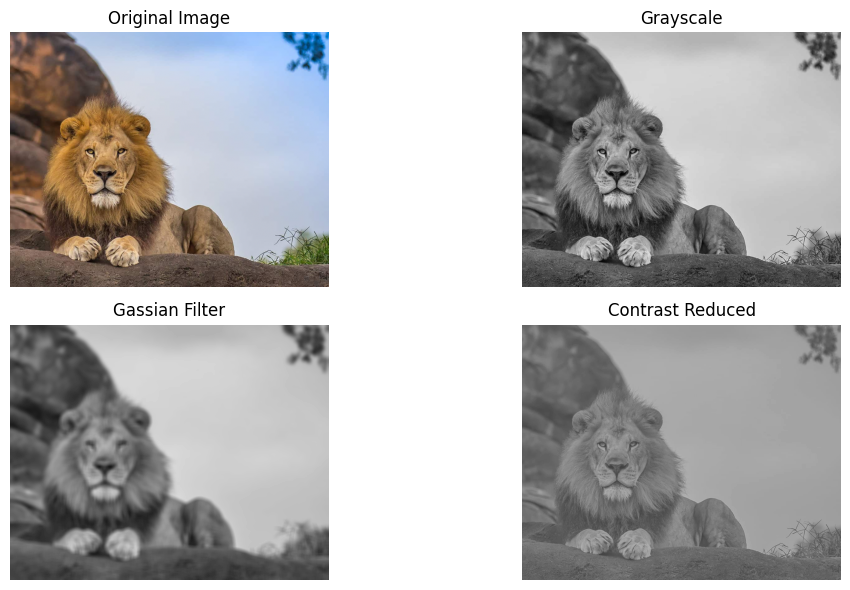

In [39]:
import matplotlib.image as img
import matplotlib.pyplot as plt
import numpy as np

imageLion = img.imread('Lion.jpg')

if imageLion.max() > 1.0:
    imageLion = imageLion / 255.0
    
# Extract RGB channels
# asked chatgpt how to index into an img array
red = imageLion[:,:,0]
green = imageLion[:,:,1]
blue = imageLion[:,:,2]

gamma = 1.04
r_const = 0.299
g_const = 0.587
b_const = 0.114

grayscaleLion = np.clip((r_const * red   ** gamma +
                         g_const * green ** gamma +
                         b_const * blue  ** gamma), 0.0, 1.0).astype(np.float32)


def gaussian(x, y, sigma):
    return np.exp(-(x**2 + y**2) / (2 * sigma**2))

def gaussian_filter(image, window_size, sigma):

    H,W = image.shape
    pad = window_size // 2

    # create a coordinate gride at 0
    u = np.arange(-pad, pad + 1)
    v = np.arange(-pad, pad + 1)
    U, V = np.meshgrid(u, v)

    #create a gaussian kernel
    kernel = gaussian(U, V, sigma)
    kernel = kernel / np.sum(kernel)
    
    paddedImg = np.pad(image, pad, mode='reflect')
    filteredImg = np.zeros((H,W))

    for i in range(H):
        for j in range(W):
            win = paddedImg[i:i+window_size, j:j+window_size]
            filteredImg[i, j] = np.sum(win * kernel)

    return np.clip(filteredImg, 0.0, 1.0)

gaussianLion = gaussian_filter(grayscaleLion, 15, 80)


contrast_scale = 0.5
contrastLion = (grayscaleLion - 0.5) * contrast_scale + 0.5
contrastLion = np.clip(contrastLion, 0.0, 1.0)


# 1 row, 2 columns
fig, axes = plt.subplots(2, 2, figsize=(12, 6))

# Original image
axes[0][0].imshow(imageLion)
axes[0][0].axis('off')
axes[0][0].set_title("Original Image")

# Grayscale image
axes[0][1].imshow(grayscaleLion, cmap='gray', vmin=0.0, vmax=1.0)
axes[0][1].axis('off')
axes[0][1].set_title("Grayscale")

axes[1][0].imshow(gaussianLion, cmap='gray', vmin=0.0, vmax=1.0)
axes[1][0].axis('off')
axes[1][0].set_title("Gassian Filter")

# Grayscale image
axes[1][1].imshow(contrastLion, cmap='gray', vmin=0.0, vmax=1.0)
axes[1][1].axis('off')
axes[1][1].set_title("Contrast Reduced")

# asked chatgpt how to display images with matplotlib
plt.tight_layout()
plt.show()


B)  Compute the local mean and standard deviation within 11×11 neighbourhoods for all three images. Display the resulting local-mean and standard-deviation maps. Comment briefly on how blur and contrast reduction alter these statistics.

Compute the luminance similarity (L), contrast similarity (C), and structure similarity (S) maps between the reference and each modified image using the constants: $C_1 = (0.01 * L_{max})^2, C_2 = (0.03 * L_{max})^2, C_3 = C_2/2$

Combine the three components to form the SSIM map and compute the mean SSIM 
index. Show all four maps (L, C, S, and SSIM) in a 2×2 grid. 
Briefly describe which component contributes most to the visual difference between 
the original and each distorted image.

Introduce two additional modifications:

i. A uniform brightness shift (+30 grey levels) to illustrate luminance masking 
behaviour.

ii. A local contrast boost (to illustrate contrast masking). 
Compute and compare only the L and C maps for these cases, and relate your 
observations to the concept of masking.

Generate three further distortions – JPEG compression, motion blur, and salt-and-pepper noise. 
Compute PSNR and mean SSIM for each distorted image and summarize the results in a 
table. 
Discuss in 3–4 sentences why SSIM aligns better with perceived quality than PSNR for 
these distortions.

## Problem 2: Edge Detection  

The goal of this problem is to compare several second-order and gradient-based edge 
detection techniques and analyze their sensitivity to noise, scale, and thresholding. You will 
examine the Laplacian, Laplacian of Gaussian (LoG), Difference of Gaussian (DoG), and 
Canny edge detector.

A) Read in a reference image Coral.jpg and convert it to grayscale. Create a noisy version of 
the image by adding Gaussian white noise with zero mean and variance = 0.002. Display 
the original and noisy images side-by-side with titles. 

B) Apply the simple Laplacian operator (choose either the 4- or 8-neighbor kernel) to both 
images. Display the resulting edge magnitude maps. Briefly discuss how noise influences 
the Laplacian response.

C) Construct and apply the Laplacian of Gaussian (LoG) filter with σ = 1 and σ = 2. Compare 
the results to part (b). Comment on how increasing the Gaussian scale affects edge 
sharpness and noise suppression.

D) Implement the Difference of Gaussian (DoG) detector using two Gaussian filters with σ₁ = 
1 and σ₂ = 2. Display the DoG edge map and compare it with the LoG output. Mention one 
computational advantage of DoG over LoG 

E) Apply the Canny edge detector to both the clean and noisy images using appropriate low and high thresholds. Display the resulting edge maps.

F) Combine all results (Laplacian, LoG, DoG, Canny) in a single 2×2 figure grid. Briefly, summarize which method provides the most reliable edges under noise and why 
smoothing before differentiation generally improves performance. 

## Case Study: YOLO (You Only Look Once) Algorithm 

The goal of this problem is to study how the YOLO (“You Only Look Once”) detector behaves 
on still images. Use the YOLO model and Python package linked in the Module 8 notes 

A) Run the provided YOLO model on the given image Mountain.png. Display the resulting detections by overlaying the predicted bounding boxes and class labels. List all detected object classes and their confidence scores in a table. 

B) Create a blurred version of the reference image using a Gaussian filter with a chosen σ that produces visible edge softening. Run YOLO on this blurred image. Compare the number of detected objects and confidence values with those from part (a). Briefly comment on the effect of blur on YOLO’s detection performance.

C) For a second image, you are provided with YOLO output in a text file (in the data folder, provided with the assignment) containing bounding-box coordinates, class labels, and confidence values. Using a confidence threshold of 0.5, determine which detections would be retained and which would be discarded. Organize the results in table: kept detections and discarded detections.

D) Using the same YOLO results for the second image, visually inspect the image and identify at least one false positive and one missed object. Using concepts from image processing (edges, clutter, scale, illumination), give two plausible image-based reasons for each type of error

E) Summarize, the main strengths and limitations of YOLO for multi-object detection on static images. Focus on how blur, contrast, scene complexity, and object size influence YOLO’s outputs, and briefly discuss why a one-pass detection framework is advantageous for image analysis tasks. 